In [4]:
%matplotlib inline
import pandas as pd, numpy as np, matplotlib.pyplot as plt
import matplotlib.cm as cm, matplotlib.font_manager as fm

In [7]:
df = pd.read_csv('C:/Users/19110/Desktop/ptua/PTUA2020/Lab06/data/summer-travel-gps-full.csv', encoding='utf-8', index_col='date', parse_dates=True)
rs = pd.read_csv('C:/Users/19110/Desktop/ptua/PTUA2020/Lab06/data/summer-travel-gps-dbscan.csv', encoding='utf-8')

In [13]:
title_font = fm.FontProperties(family='DejaVu Sans', style='normal', size=15, weight='normal', stretch='normal')
label_font = fm.FontProperties(family='DejaVu Sans', style='normal', size=12, weight='normal', stretch='normal')
ticks_font = fm.FontProperties(family='DejaVu Sans', style='normal', size=10, weight='normal', stretch='normal')
annotation_font = fm.FontProperties(family='DejaVu Sans', style='normal', size=10, weight='normal', stretch='normal')

In [15]:
countries = df['country'].value_counts()
countries

Spain                     646
Portugal                  256
Germany                   225
Czech Republic            130
Poland                    104
Turkey                     94
Greece                     82
Montenegro                 51
Macedonia (FYROM)          34
Kosovo                     30
Croatia                    30
Albania                    29
Bosnia and Herzegovina     26
Serbia                     15
United Kingdom              7
Name: country, dtype: int64

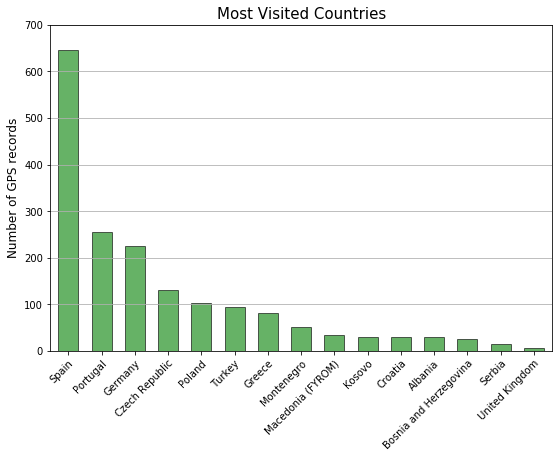

In [17]:
ax = countries.plot(kind='bar', figsize=[9, 6], width=0.6, alpha=0.6, 
                    color='g', edgecolor='k', grid=False, ylim=[0, 700])

ax.set_xticklabels(countries.index, rotation=45, rotation_mode='anchor', ha='right', fontproperties=ticks_font)
ax.yaxis.grid(True)
for label in ax.get_yticklabels():
    label.set_fontproperties(ticks_font)

ax.set_title('Most Visited Countries', fontproperties=title_font)
ax.set_xlabel('')
ax.set_ylabel('Number of GPS records', fontproperties=label_font)

plt.show()

## re-create the plot above, but make the bars orange with maroon edges.

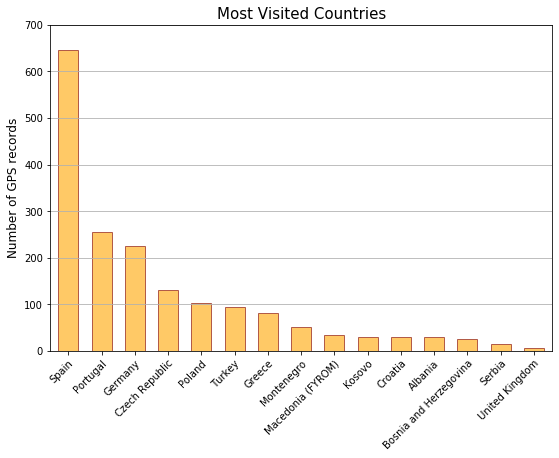

In [18]:
ax = countries.plot(kind='bar', figsize=[9, 6], width=0.6, alpha=0.6, 
                    color='orange', edgecolor='maroon', grid=False, ylim=[0, 700])

ax.set_xticklabels(countries.index, rotation=45, rotation_mode='anchor', ha='right', fontproperties=ticks_font)
ax.yaxis.grid(True)
for label in ax.get_yticklabels():
    label.set_fontproperties(ticks_font)

ax.set_title('Most Visited Countries', fontproperties=title_font)
ax.set_xlabel('')
ax.set_ylabel('Number of GPS records', fontproperties=label_font)

plt.show()

In [19]:
def bar_chart(data, title='', xlabel='', ylabel='', color='k', ylim=None):
    
    ax = data.plot(kind='bar', figsize=[9, 6], width=0.6, alpha=0.6, 
                   color=color, edgecolor='k', grid=False, ylim=ylim)

    ax.set_xticklabels(data.index, rotation=45, rotation_mode='anchor', ha='right', fontproperties=ticks_font)
    ax.yaxis.grid(True)
    for label in ax.get_yticklabels():
        label.set_fontproperties(ticks_font)
 
    ax.set_title(title, fontproperties=title_font)
    ax.set_xlabel(xlabel, fontproperties=label_font)
    ax.set_ylabel(ylabel, fontproperties=label_font)

    plt.show()

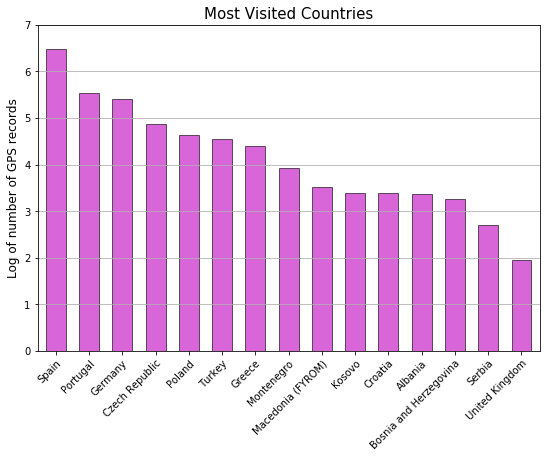

In [20]:
log_countries = np.log(df['country'].value_counts())

bar_chart(data=log_countries, 
          title='Most Visited Countries', 
          ylabel='Log of number of GPS records', 
          color='m', 
          ylim=[0,7])

In [21]:
cities = df['city'].value_counts().head(13)
cities

Barcelona    632
Lisbon       158
Tübingen     131
Prague        97
Istanbul      94
Athens        67
Krakow        58
Porto         58
Freiburg      54
Kotor         51
Ohrid         34
Prizren       30
Berat         27
Name: city, dtype: int64

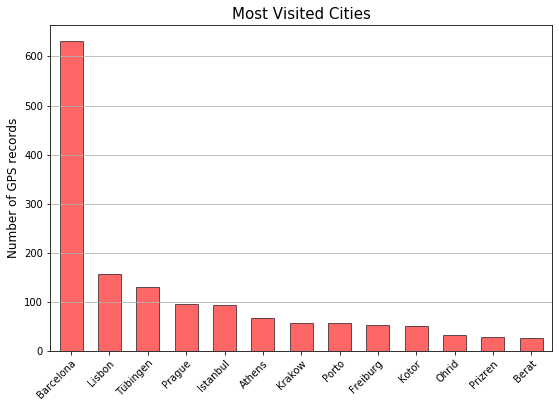

In [22]:
title = 'Most Visited Cities'
ylabel = 'Number of GPS records'
color = 'r'
bar_chart(cities, title=title, ylabel=ylabel, color=color)

## use our bar_chart() function to create a plot like the one above, but give it an x-axis label and use the cities' log values, like we did earlier for countries

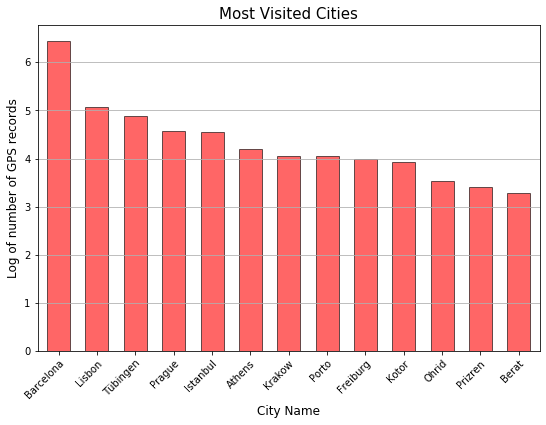

In [26]:
cities = df['city'].value_counts().head(13)
log_cities = np.log(cities)
bar_chart(data=log_cities, 
          title='Most Visited Cities', 
          ylabel='Log of number of GPS records', 
          xlabel= 'City Name',
          color=color)

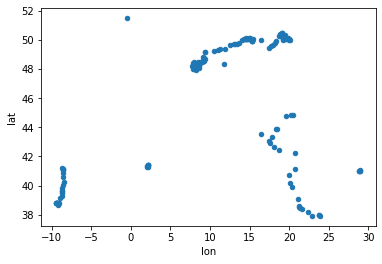

In [27]:
rs.plot(kind='scatter', x='lon', y='lat')

In [29]:
most_visited_cities_index = df['city'].value_counts().head(8).index
most_visited_cities = pd.DataFrame(df[df['city'].isin(most_visited_cities_index)])
most_visited_cities.drop_duplicates(subset=['city'], keep='first', inplace=True)
most_visited_cities

,lat,lon,city,country
date,,,,
2014-05-14 15:11:00,38.781775,-9.137544,Lisbon,Portugal
2014-05-17 15:13:00,41.145266,-8.610441,Porto,Portugal
2014-05-19 00:04:00,41.377119,2.151632,Barcelona,Spain
2014-05-30 17:59:00,50.097330,19.895394,Krakow,Poland
2014-06-02 12:10:00,50.087729,14.660600,Prague,Czech Republic
2014-06-06 19:06:00,48.518270,9.058023,Tübingen,Germany
2014-07-05 05:32:00,37.967669,23.729203,Athens,Greece
2014-07-06 20:42:00,40.982352,28.815756,Istanbul,Turkey


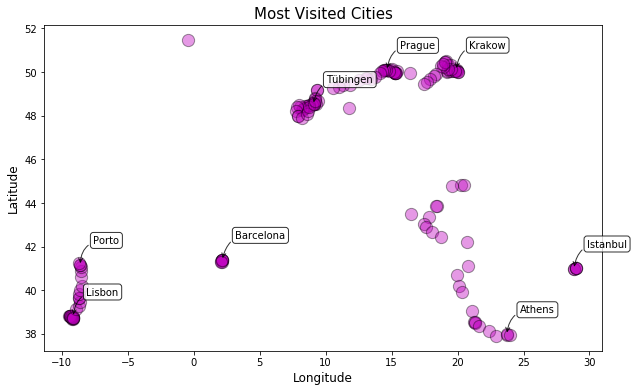

In [30]:
fig, ax = plt.subplots()
fig.set_size_inches(10, 6)
rs_scatter = ax.scatter(x=rs['lon'], y=rs['lat'], c='m', edgecolor='k', alpha=.4, s=150)

for label in ax.get_xticklabels():
    label.set_fontproperties(ticks_font)
for label in ax.get_yticklabels():
    label.set_fontproperties(ticks_font)
    
ax.set_title('Most Visited Cities', fontproperties=title_font)
ax.set_xlabel('Longitude', fontproperties=label_font)
ax.set_ylabel('Latitude', fontproperties=label_font)

bbox_style = {'boxstyle':'round', 'color':'k', 'fc':'w', 'alpha':0.8}
arrowprops_style = {'arrowstyle':'->', 'connectionstyle':'arc3,rad=0.5', 'color':'k', 'alpha':0.8}
annotate_cities = lambda row: ax.annotate(row['city'], 
                                          xy=(row['lon'], row['lat']),
                                          xytext=(row['lon'] + 1, row['lat'] + 1),
                                          fontproperties=annotation_font,
                                          bbox=bbox_style,
                                          xycoords='data',
                                          arrowprops=arrowprops_style)
most_visited_cities.apply(annotate_cities, axis=1)

plt.show()

## re-create the scatter plot above, but give the points a different size and alpha. Experiment with moving the annotation labels around and changing the arrow style

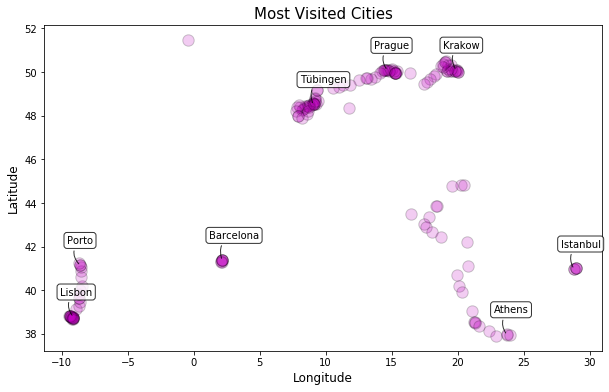

In [34]:
fig, ax = plt.subplots()
fig.set_size_inches(10, 6)
rs_scatter = ax.scatter(x=rs['lon'], y=rs['lat'], c='m', edgecolor='k', alpha=.2, s=130)

for label in ax.get_xticklabels():
    label.set_fontproperties(ticks_font)
for label in ax.get_yticklabels():
    label.set_fontproperties(ticks_font)
    
ax.set_title('Most Visited Cities', fontproperties=title_font)
ax.set_xlabel('Longitude', fontproperties=label_font)
ax.set_ylabel('Latitude', fontproperties=label_font)

bbox_style = {'boxstyle':'round', 'color':'k', 'fc':'w', 'alpha':0.8}
arrowprops_style = {'arrowstyle':'-', 'connectionstyle':'arc3,rad=0.5', 'color':'k', 'alpha':0.8}
annotate_cities = lambda row: ax.annotate(row['city'], 
                                          xy=(row['lon'], row['lat']),
                                          xytext=(row['lon'] -1, row['lat']+1),
                                          fontproperties=annotation_font,
                                          bbox=bbox_style,
                                          xycoords='data',
                                          arrowprops=arrowprops_style)
most_visited_cities.apply(annotate_cities, axis=1)

plt.show()

In [35]:
countdata = df.groupby(df.index.date).size()
countdata.head()

2014-05-14    36
2014-05-15    61
2014-05-16    57
2014-05-17    64
2014-05-18    50
dtype: int64

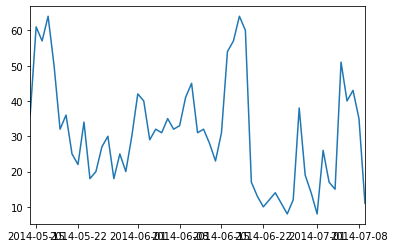

In [36]:
countdata.plot(kind='line')

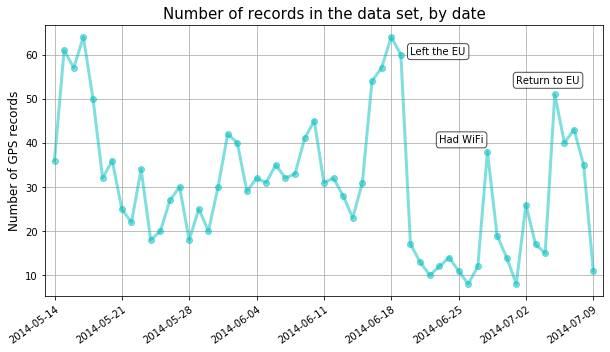

In [37]:
fig, ax = plt.subplots()
ax = countdata.plot(kind='line',
                    figsize=[10, 5],
                    linewidth='3', 
                    alpha=0.5,
                    marker='o',
                    color='c')

ax.annotate('Left the EU', 
                 xy=('2014-06-20', 60),
                 fontproperties=annotation_font,
                 bbox=dict(boxstyle='round', color='k', fc='w', alpha=0.7),
                 xycoords='data')

ax.annotate('Had WiFi', 
                 xy=('2014-06-23', 40),
                 fontproperties=annotation_font,
                 bbox=dict(boxstyle='round', color='k', fc='w', alpha=0.7),
                 xycoords='data')

ax.annotate('Return to EU', 
                 xy=('2014-07-01', 53.5),
                 fontproperties=annotation_font,
                 bbox=dict(boxstyle='round', color='k', fc='w', alpha=0.7),
                 xycoords='data')

n = len(countdata) / int(fig.get_size_inches()[0])
xtick_data = countdata.iloc[range(0, len(countdata), 7)]
ax.xaxis.set_ticks(xtick_data.index)
ax.set_xlim(['2014-05-13', '2014-07-10'])

ax.xaxis.grid(True)
ax.yaxis.grid(True)

ax.set_xticklabels(xtick_data.index, rotation=35, rotation_mode='anchor', ha='right', fontproperties=ticks_font)
for label in ax.get_yticklabels():
    label.set_fontproperties(ticks_font)
ax.set_title('Number of records in the data set, by date', fontproperties=title_font)
ax.set_xlabel('', fontproperties=label_font)
ax.set_ylabel('Number of GPS records', fontproperties=label_font)

plt.show()

## re-create the plot above with different line widths, colors, and point markers. Play with moving the annotation labels around. Make the vertical tick marks 3 days apart instead of 5

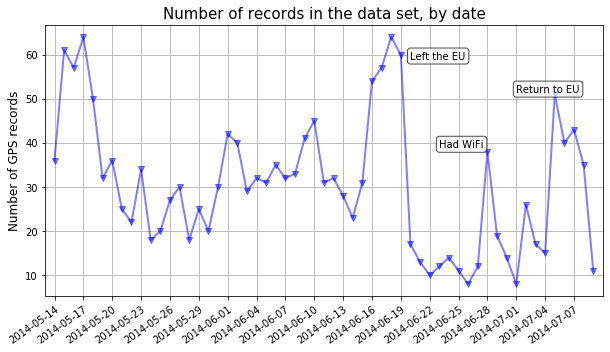

In [39]:
fig, ax = plt.subplots()
ax = countdata.plot(kind='line',
                    figsize=[10, 5],
                    linewidth='2', 
                    alpha=0.5,
                    marker='v',
                    color='b')

ax.annotate('Left the EU', 
                 xy=('2014-06-20', 59),
                 fontproperties=annotation_font,
                 bbox=dict(boxstyle='round', color='k', fc='w', alpha=0.7),
                 xycoords='data')

ax.annotate('Had WiFi', 
                 xy=('2014-06-23', 39),
                 fontproperties=annotation_font,
                 bbox=dict(boxstyle='round', color='k', fc='w', alpha=0.7),
                 xycoords='data')

ax.annotate('Return to EU', 
                 xy=('2014-07-01', 52.5-1),
                 fontproperties=annotation_font,
                 bbox=dict(boxstyle='round', color='k', fc='w', alpha=0.7),
                 xycoords='data')

n = len(countdata) / int(fig.get_size_inches()[0])
xtick_data = countdata.iloc[range(0, len(countdata), 3)]
ax.xaxis.set_ticks(xtick_data.index)
ax.set_xlim(['2014-05-13', '2014-07-10'])

ax.xaxis.grid(True)
ax.yaxis.grid(True)

ax.set_xticklabels(xtick_data.index, rotation=35, rotation_mode='anchor', ha='right', fontproperties=ticks_font)
for label in ax.get_yticklabels():
    label.set_fontproperties(ticks_font)
ax.set_title('Number of records in the data set, by date', fontproperties=title_font)
ax.set_xlabel('', fontproperties=label_font)
ax.set_ylabel('Number of GPS records', fontproperties=label_font)

plt.show()

In [49]:
cities = df['city'].value_counts()
print(cities.count())
cities.head()

113


Barcelona    632
Lisbon       158
Tübingen     131
Prague        97
Istanbul      94
Name: city, dtype: int64

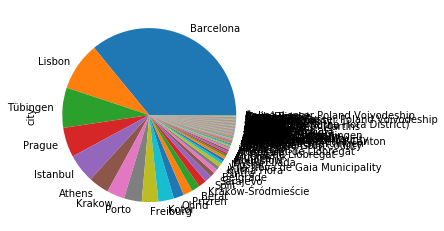

In [50]:
cities.plot(kind='pie')

In [51]:
rentals = pd.read_csv('C:/Users/19110/Desktop/ptua/PTUA2020/Lab06/data/sfbay_geocoded.csv', dtype={'fips_block': str})
rentals = rentals.iloc[:,2:]
print(rentals.head())
print(rentals.shape)
print(rentals['rent'].describe())
print(rentals['sqft'].describe())

          pid        date region              neighborhood    rent  bedrooms  \
0  4465937146  2014-05-11  sfbay  twin peaks / diamond hts  4500.0       2.0   
1  4446270486  2014-05-11  sfbay                 sunnyvale  2650.0       2.0   
2  4465913377  2014-05-11  sfbay                 glen park  3100.0       2.0   
3  4465933497  2014-05-11  sfbay              redwood city  1850.0       1.0   
4  4465926659  2014-05-11  sfbay              walnut creek  1325.0       1.0   

     sqft  rent_sqft  rent_sqft_cat   longitude   latitude         county  \
0  1200.0   3.750000              5 -122.438300  37.745000  San Francisco   
1  1040.0   2.548077              5 -122.008131  37.353699    Santa Clara   
2  1000.0   3.100000              5 -122.439743  37.731584  San Francisco   
3   792.0   2.335859              5 -122.234294  37.491715      San Mateo   
4   642.0   2.063863              5 -122.087751  37.923448   Contra Costa   

        fips_block state  
0  060750216002015    CA  
1 

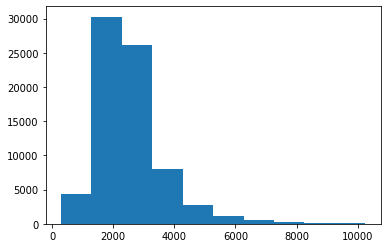

In [52]:
plt.hist(rentals['rent'])
plt.show()

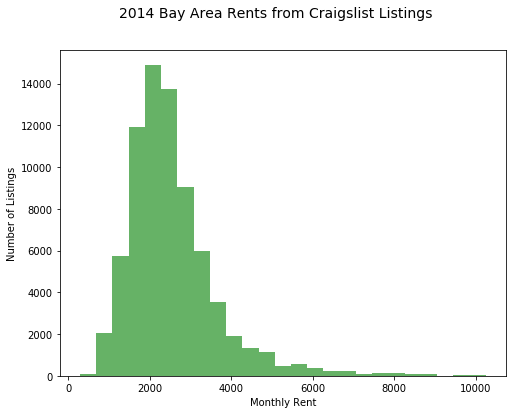

In [53]:
plt.figure(1, figsize=(8,6), )
plt.suptitle('2014 Bay Area Rents from Craigslist Listings', fontsize=14)
plt.xlabel('Monthly Rent')
plt.ylabel('Number of Listings')
ax = plt.hist(rentals['rent'], bins=25, alpha=.6, color='g')
plt.show()

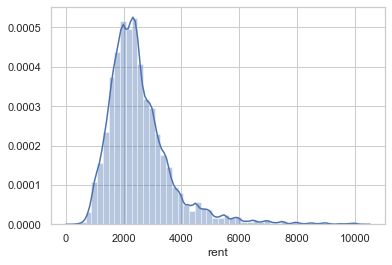

In [56]:
import seaborn as sns
sns.set()
sns.set_style("whitegrid")
sns.distplot(rentals['rent'])

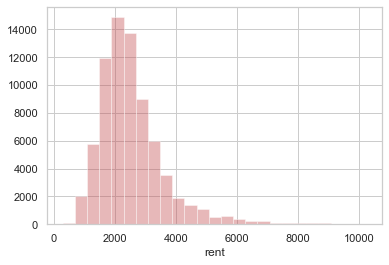

In [57]:
sns.distplot(rentals['rent'], bins=25, color='r', kde=False);

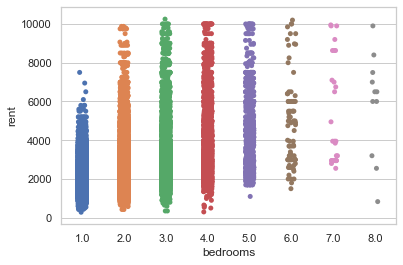

In [58]:
sns.stripplot(x="bedrooms", y="rent", data=rentals);

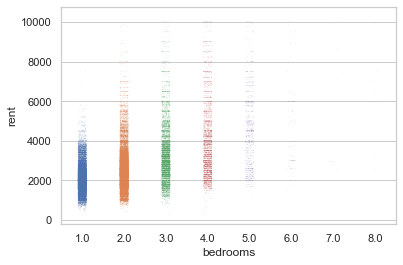

In [59]:
sns.stripplot(x="bedrooms", y="rent", data=rentals, jitter=1, size=0.5, alpha=.5);

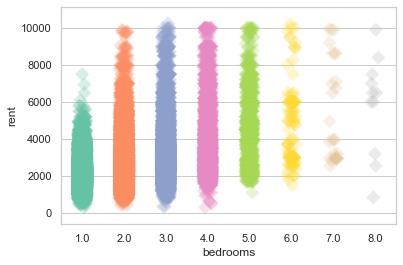

In [60]:
ax =  sns.stripplot("bedrooms", "rent", data=rentals,
                   palette="Set2", size=10, marker="D",
                   edgecolor="gray", alpha=.25)